<img src="https://raw.githubusercontent.com/Kmilo29/repository/main/images/proyecto.png" ><br>

# MINE-4101: Ciencia de Datos Aplicada
## Universidad de los Andes
Segundo Semestre - 2023


## Empresa OPAIN S.A.


## Integrantes

* Sebastian Arango Loaiza
* Nicolas Adolfo Castillo Betancourt
* Johan David Rodriguez Portela
* Ivan Camilo Delgado Cañon

# **Extension de datos de pais**

Este notebook lee los datasets generados para cada muelle y marca, y les anade informacion de PIB y region, proveniente de otras fuentes.

## Librerias

In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd

# Utils
import univariate_utils, multivariate_utils
import utils_functions as utils

import matplotlib.pyplot as plt
import seaborn as sns

## Constantes
Constantes que almacenan ubicaciones y nombres de los archivos para facilitar cambios organizados y centralizados en el proyecto, mejorando la legibilidad y mantenimiento del código.

In [2]:
# Dataset folder
LOAD_DATASET_FOLDER = "data"
# IATA code df
LOAD_IATA_FILE = "raw_data/Aeropuertos.csv"
# PIB df
LOAD_PIB_FILE = "'raw_data/pib.csv"
# HDI df
LOAD_HDI_FILE = 'raw_data/hdi.csv'

In [3]:
# Extended data folder
OUTPUT_DATASET_FOLDER = "extended_data"

## Utils
Carga archivos con extensión ".parquet" que contienen las cadenas "marca" o "muelle" en sus nombres desde la carpeta determinada. Tambien organiza un diccionario donde las claves son nombres descriptivos. Facilitando la carga y acceso a múltiples conjuntos de datos de forma organizada.

In [4]:
def load_datasets():
    """Reads datasets from load folder"""
    return {
        filename.split("/")[-1].split(".")[0]:
        pd.read_parquet(f"{LOAD_DATASET_FOLDER}/{filename}")
        for filename in os.listdir(LOAD_DATASET_FOLDER)
        if ("marca" in filename) or ("muelle" in filename)
    }

In [5]:
def add_column_cyclical_features(df, col_name_time, period, start_num=0):
    """Given a period size, transforms numerical time column into sin/cos columns"""
    values = 2 * np.pi * (df[col_name_time] - start_num) / period
    kwargs = {f'sin_{col_name_time}': lambda x: np.sin(values),
              f'cos_{col_name_time}': lambda x: np.cos(values)}
    return df.assign(**kwargs)

## Ejecucion

### Carga de datasets

In [6]:
datasets = load_datasets()

In [7]:
for dataset_name, df_dataset in datasets.items():
    print("*" * 20)
    print(dataset_name)
    univariate_utils.make_not_graphic_analysis(df_dataset)

********************
marca 1
----- dataset info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47722 entries, 0 to 47721
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   IATA CODE                    47722 non-null  object        
 1   Destino                      47722 non-null  object        
 2   Tipo de vuelo                47722 non-null  object        
 3   Sala                         47722 non-null  object        
 4   Muelle                       47722 non-null  object        
 5   AEROLÍNEA                    47722 non-null  object        
 6   Tipo aerolínea               47722 non-null  object        
 7   STD                          47722 non-null  datetime64[ns]
 8   Hora entera                  47722 non-null  int64         
 9   FECHA DIA                    47722 non-null  object        
 10  Pasajeros saliendo           47722 non-null  float64

IATA CODE                      0.0
Destino                        0.0
Tipo de vuelo                  0.0
Sala                           0.0
Muelle                         0.0
AEROLÍNEA                      0.0
Tipo aerolínea                 0.0
STD                            0.0
Hora entera                    0.0
FECHA DIA                      0.0
Pasajeros saliendo             0.0
Semana                         0.0
Mes                            0.0
Día                            0.0
Año                            0.0
Pasajeros por Muelle y Hora    0.0
Porcentaje pasajeros vuelo     0.0
valor_venta                    0.0
Parte de valor_venta           0.0
dtype: float64

----- Object column statistics -----


,IATA CODE,Destino,Tipo de vuelo,Sala,Muelle,AEROLÍNEA,Tipo aerolínea,FECHA DIA
count,47722,47722,47722,47722,47722,47722,47722,47722
unique,65,62,1,19,1,39,4,7
top,MIA,miami,internacional,a8,muelle internacional oriente,avianca s a,legacy,lunes
freq,4435,4435,47722,4301,47722,23587,39706,7015


----- Number column statistics -----


,Hora entera,Pasajeros saliendo,Semana,Mes,Día,Año,Pasajeros por Muelle y Hora,Porcentaje pasajeros vuelo,valor_venta,Parte de valor_venta
count,47722.000000,47722.000000,47722.000000,47722.000000,47722.000000,47722.000000,47722.000000,47722.000000,4.772200e+04,4.772200e+04
mean,12.291040,157.490026,22.993441,5.702276,15.738234,2022.394116,202.095501,0.881396,1.853428e+08,1.633807e+08
std,6.610355,48.549598,14.083783,3.219927,8.762350,0.488665,110.469668,0.235732,1.158635e+08,1.157178e+08
min,0.000000,0.000000,1.000000,1.000000,1.000000,2022.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
5%,1.000000,90.000000,3.000000,1.000000,2.000000,2022.000000,95.000000,0.348940,2.253974e+07,1.877772e+07
25%,7.000000,124.000000,11.000000,3.000000,8.000000,2022.000000,131.000000,1.000000,9.633014e+07,6.933650e+07
50%,13.000000,152.000000,22.000000,5.000000,16.000000,2022.000000,165.000000,1.000000,1.646188e+08,1.370818e+08
75%,17.000000,180.000000,32.000000,8.000000,23.000000,2023.000000,250.000000,1.000000,2.694355e+08,2.425796e+08
95%,23.000000,261.500000,49.000000,12.000000,29.000000,2023.000000,437.000000,1.000000,3.924918e+08,3.812926e+08
max,23.000000,261.500000,52.000000,12.000000,31.000000,2023.000000,909.000000,1.000000,7.244024e+08,5.024444e+08


----- First five rows -----


,IATA CODE,Destino,Tipo de vuelo,Sala,Muelle,AEROLÍNEA,Tipo aerolínea,STD,Hora entera,FECHA DIA,Pasajeros saliendo,Semana,Mes,Día,Año,Pasajeros por Muelle y Hora,Porcentaje pasajeros vuelo,valor_venta,Parte de valor_venta
0,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-07-09 22:45:00,22,sabado,90.0,27,7,9,2022,90.0,1.0,194961332.5,194961332.5
1,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-07-11 22:45:00,22,lunes,74.0,28,7,11,2022,74.0,1.0,209068872.5,209068872.5
2,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-09-21 22:45:00,22,miercoles,80.0,38,9,21,2022,80.0,1.0,196129920.0,196129920.0
3,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2023-03-29 22:40:00,22,miercoles,118.0,13,3,29,2023,118.0,1.0,313717772.5,313717772.5
4,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2023-06-05 22:40:00,0,martes,112.0,23,6,6,2023,112.0,1.0,285900852.5,285900852.5


********************
marca 10
----- dataset info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13280 entries, 0 to 13279
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   IATA CODE                    13280 non-null  object        
 1   Destino                      13280 non-null  object        
 2   Tipo de vuelo                13280 non-null  object        
 3   Sala                         13280 non-null  object        
 4   Muelle                       13280 non-null  object        
 5   AEROLÍNEA                    13280 non-null  object        
 6   Tipo aerolínea               13280 non-null  object        
 7   STD                          13280 non-null  datetime64[ns]
 8   Hora entera                  13280 non-null  int64         
 9   FECHA DIA                    13280 non-null  object        
 10  Pasajeros saliendo           13280 non-null  float6

IATA CODE                      0.0
Destino                        0.0
Tipo de vuelo                  0.0
Sala                           0.0
Muelle                         0.0
AEROLÍNEA                      0.0
Tipo aerolínea                 0.0
STD                            0.0
Hora entera                    0.0
FECHA DIA                      0.0
Pasajeros saliendo             0.0
Semana                         0.0
Mes                            0.0
Día                            0.0
Año                            0.0
Pasajeros por Muelle y Hora    0.0
Porcentaje pasajeros vuelo     0.0
valor_venta                    0.0
Parte de valor_venta           0.0
dtype: float64

----- Object column statistics -----


,IATA CODE,Destino,Tipo de vuelo,Sala,Muelle,AEROLÍNEA,Tipo aerolínea,FECHA DIA
count,13280,13280,13280,13280,13280,13280,13280,13280
unique,56,53,1,18,1,34,4,7
top,MIA,miami,internacional,a12,muelle internacional oriente,avianca s a,legacy,viernes
freq,1179,1179,13280,1175,13280,7386,11631,2051


----- Number column statistics -----


,Hora entera,Pasajeros saliendo,Semana,Mes,Día,Año,Pasajeros por Muelle y Hora,Porcentaje pasajeros vuelo,valor_venta,Parte de valor_venta
count,13280.000000,13280.000000,13280.000000,13280.000000,13280.000000,13280.000000,13280.000000,13280.000000,1.328000e+04,1.328000e+04
mean,13.863479,161.781890,23.070181,5.751431,16.064684,2022.680045,204.321837,0.884262,1.198591e+07,1.022249e+07
std,5.606801,48.051997,15.759141,3.624627,8.647290,0.466476,105.314776,0.230027,9.413927e+06,7.818579e+06
min,0.000000,0.000000,1.000000,1.000000,1.000000,2022.000000,0.000000,0.000000,1.342400e+06,0.000000e+00
5%,6.000000,93.000000,3.000000,1.000000,2.000000,2022.000000,97.000000,0.379221,2.518600e+06,1.760000e+06
25%,9.000000,128.000000,10.000000,3.000000,9.000000,2022.000000,138.000000,1.000000,5.145700e+06,3.998000e+06
50%,14.000000,160.000000,19.000000,5.000000,16.000000,2023.000000,171.000000,1.000000,9.476400e+06,7.886400e+06
75%,18.000000,182.000000,40.000000,10.000000,24.000000,2023.000000,250.000000,1.000000,1.601835e+07,1.429942e+07
95%,23.000000,260.000000,50.000000,12.000000,29.000000,2023.000000,421.000000,1.000000,3.178820e+07,2.954780e+07
max,23.000000,261.500000,52.000000,12.000000,31.000000,2023.000000,704.500000,1.000000,7.804780e+07,2.975154e+07


----- First five rows -----


,IATA CODE,Destino,Tipo de vuelo,Sala,Muelle,AEROLÍNEA,Tipo aerolínea,STD,Hora entera,FECHA DIA,Pasajeros saliendo,Semana,Mes,Día,Año,Pasajeros por Muelle y Hora,Porcentaje pasajeros vuelo,valor_venta,Parte de valor_venta
0,AEP,buenos aires,internacional,a10,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-09-30 22:45:00,22,viernes,118.0,39,9,30,2022,118.0,1.000000,7886400.0,7.886400e+06
1,AEP,buenos aires,internacional,a11,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-10-02 22:45:00,0,lunes,117.0,40,10,3,2022,117.0,1.000000,36853200.0,2.975154e+07
2,AEP,buenos aires,internacional,a11,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-11-20 23:00:00,0,lunes,100.0,47,11,21,2022,100.0,1.000000,6998000.0,6.998000e+06
3,AEP,buenos aires,internacional,a11,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-11-25 23:00:00,23,viernes,109.0,47,11,25,2022,254.0,0.429134,7486400.0,3.212668e+06
4,AEP,buenos aires,internacional,a11,muelle internacional oriente,aerolineas argentinas s a,legacy,2023-01-24 23:00:00,23,martes,110.0,4,1,24,2023,272.0,0.404412,11593600.0,4.688588e+06


********************
marca 2
----- dataset info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46421 entries, 0 to 46420
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   IATA CODE                    46421 non-null  object        
 1   Destino                      46421 non-null  object        
 2   Tipo de vuelo                46421 non-null  object        
 3   Sala                         46421 non-null  object        
 4   Muelle                       46421 non-null  object        
 5   AEROLÍNEA                    46421 non-null  object        
 6   Tipo aerolínea               46421 non-null  object        
 7   STD                          46421 non-null  datetime64[ns]
 8   Hora entera                  46421 non-null  int64         
 9   FECHA DIA                    46421 non-null  object        
 10  Pasajeros saliendo           46421 non-null  float64

IATA CODE                      0.0
Destino                        0.0
Tipo de vuelo                  0.0
Sala                           0.0
Muelle                         0.0
AEROLÍNEA                      0.0
Tipo aerolínea                 0.0
STD                            0.0
Hora entera                    0.0
FECHA DIA                      0.0
Pasajeros saliendo             0.0
Semana                         0.0
Mes                            0.0
Día                            0.0
Año                            0.0
Pasajeros por Muelle y Hora    0.0
Porcentaje pasajeros vuelo     0.0
valor_venta                    0.0
Parte de valor_venta           0.0
dtype: float64

----- Object column statistics -----


,IATA CODE,Destino,Tipo de vuelo,Sala,Muelle,AEROLÍNEA,Tipo aerolínea,FECHA DIA
count,46421,46421,46421,46421,46421,46421,46421,46421
unique,64,61,1,19,1,38,4,7
top,MIA,miami,internacional,a8,muelle internacional oriente,avianca s a,legacy,lunes
freq,4315,4315,46421,4160,46421,23469,38901,6881


----- Number column statistics -----


,Hora entera,Pasajeros saliendo,Semana,Mes,Día,Año,Pasajeros por Muelle y Hora,Porcentaje pasajeros vuelo,valor_venta,Parte de valor_venta
count,46421.00000,46421.000000,46421.000000,46421.000000,46421.000000,46421.000000,46421.000000,46421.000000,4.642100e+04,4.642100e+04
mean,12.56328,158.003242,23.194093,5.756770,15.799897,2022.403007,203.638192,0.879559,6.295254e+07,5.458417e+07
std,6.45281,48.549328,14.013903,3.207685,8.767965,0.490507,111.570073,0.237203,3.533730e+07,3.474246e+07
min,0.00000,0.000000,1.000000,1.000000,1.000000,2022.000000,0.000000,0.000000,1.335040e+05,0.000000e+00
5%,1.00000,92.000000,3.000000,1.000000,2.000000,2022.000000,96.000000,0.346187,1.080000e+07,8.645520e+06
25%,7.00000,124.000000,12.000000,3.000000,8.000000,2022.000000,132.000000,1.000000,3.605650e+07,2.672000e+07
50%,13.00000,152.000000,22.000000,6.000000,16.000000,2022.000000,165.000000,1.000000,5.982752e+07,4.876000e+07
75%,18.00000,180.000000,33.000000,8.000000,23.000000,2023.000000,251.000000,1.000000,8.586900e+07,7.761864e+07
95%,23.00000,261.500000,49.000000,12.000000,30.000000,2023.000000,440.500000,1.000000,1.258944e+08,1.192933e+08
max,23.00000,261.500000,52.000000,12.000000,31.000000,2023.000000,909.000000,1.000000,2.457438e+08,1.539666e+08


----- First five rows -----


,IATA CODE,Destino,Tipo de vuelo,Sala,Muelle,AEROLÍNEA,Tipo aerolínea,STD,Hora entera,FECHA DIA,Pasajeros saliendo,Semana,Mes,Día,Año,Pasajeros por Muelle y Hora,Porcentaje pasajeros vuelo,valor_venta,Parte de valor_venta
0,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-07-09 22:45:00,22,sabado,90.0,27,7,9,2022,90.0,1.0,111298620.0,111298620.0
1,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-07-11 22:45:00,22,lunes,74.0,28,7,11,2022,74.0,1.0,121427400.0,121427400.0
2,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-09-21 22:45:00,22,miercoles,80.0,38,9,21,2022,80.0,1.0,60865200.0,60865200.0
3,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2023-03-29 22:40:00,22,miercoles,118.0,13,3,29,2023,118.0,1.0,70176000.0,70176000.0
4,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2023-06-05 22:40:00,0,martes,112.0,23,6,6,2023,112.0,1.0,33165000.0,33165000.0


********************
marca 3
----- dataset info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43246 entries, 0 to 43245
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   IATA CODE                    43246 non-null  object        
 1   Destino                      43246 non-null  object        
 2   Tipo de vuelo                43246 non-null  object        
 3   Sala                         43246 non-null  object        
 4   Muelle                       43246 non-null  object        
 5   AEROLÍNEA                    43246 non-null  object        
 6   Tipo aerolínea               43246 non-null  object        
 7   STD                          43246 non-null  datetime64[ns]
 8   Hora entera                  43246 non-null  int64         
 9   FECHA DIA                    43246 non-null  object        
 10  Pasajeros saliendo           43246 non-null  float64

IATA CODE                      0.0
Destino                        0.0
Tipo de vuelo                  0.0
Sala                           0.0
Muelle                         0.0
AEROLÍNEA                      0.0
Tipo aerolínea                 0.0
STD                            0.0
Hora entera                    0.0
FECHA DIA                      0.0
Pasajeros saliendo             0.0
Semana                         0.0
Mes                            0.0
Día                            0.0
Año                            0.0
Pasajeros por Muelle y Hora    0.0
Porcentaje pasajeros vuelo     0.0
valor_venta                    0.0
Parte de valor_venta           0.0
dtype: float64

----- Object column statistics -----


,IATA CODE,Destino,Tipo de vuelo,Sala,Muelle,AEROLÍNEA,Tipo aerolínea,FECHA DIA
count,43246,43246,43246,43246,43246,43246,43246,43246
unique,62,59,1,18,1,37,4,7
top,MIA,miami,internacional,a12,muelle internacional oriente,avianca s a,legacy,lunes
freq,3886,3886,43246,3776,43246,23430,37415,6396


----- Number column statistics -----


,Hora entera,Pasajeros saliendo,Semana,Mes,Día,Año,Pasajeros por Muelle y Hora,Porcentaje pasajeros vuelo,valor_venta,Parte de valor_venta
count,43246.000000,43246.000000,43246.000000,43246.000000,43246.000000,43246.000000,43246.000000,43246.000000,4.324600e+04,4.324600e+04
mean,13.354137,159.658928,22.817024,5.659506,15.809000,2022.399228,207.872890,0.873283,1.095735e+08,9.538786e+07
std,5.920363,49.311823,13.965687,3.190970,8.788406,0.489745,113.555636,0.241928,6.082407e+07,5.944075e+07
min,0.000000,0.000000,1.000000,1.000000,1.000000,2022.000000,0.000000,0.000000,1.159664e+05,0.000000e+00
5%,5.000000,92.000000,3.000000,1.000000,2.000000,2022.000000,97.000000,0.338424,2.642264e+07,1.696171e+07
25%,8.000000,125.000000,11.000000,3.000000,8.000000,2022.000000,135.000000,1.000000,6.529963e+07,4.811064e+07
50%,13.000000,154.000000,22.000000,5.000000,16.000000,2022.000000,169.000000,1.000000,1.018650e+08,8.527068e+07
75%,18.000000,182.000000,32.000000,8.000000,23.000000,2023.000000,256.000000,1.000000,1.449971e+08,1.325707e+08
95%,23.000000,261.500000,49.000000,12.000000,30.000000,2023.000000,452.000000,1.000000,2.178543e+08,2.103328e+08
max,23.000000,261.500000,52.000000,12.000000,31.000000,2023.000000,909.000000,1.000000,7.872604e+08,2.592607e+08


----- First five rows -----


,IATA CODE,Destino,Tipo de vuelo,Sala,Muelle,AEROLÍNEA,Tipo aerolínea,STD,Hora entera,FECHA DIA,Pasajeros saliendo,Semana,Mes,Día,Año,Pasajeros por Muelle y Hora,Porcentaje pasajeros vuelo,valor_venta,Parte de valor_venta
0,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-07-09 22:45:00,22,sabado,90.0,27,7,9,2022,90.0,1.0,113555711.0,113555711.0
1,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-07-11 22:45:00,22,lunes,74.0,28,7,11,2022,74.0,1.0,149023069.7,149023069.7
2,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-09-21 22:45:00,22,miercoles,80.0,38,9,21,2022,80.0,1.0,110746861.8,110746861.8
3,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2023-03-29 22:40:00,22,miercoles,118.0,13,3,29,2023,118.0,1.0,96897495.2,96897495.2
4,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2023-06-05 22:40:00,0,martes,112.0,23,6,6,2023,112.0,1.0,93910172.0,93910172.0


********************
marca 5
----- dataset info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35756 entries, 0 to 35755
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   IATA CODE                    35756 non-null  object        
 1   Destino                      35756 non-null  object        
 2   Tipo de vuelo                35756 non-null  object        
 3   Sala                         35756 non-null  object        
 4   Muelle                       35756 non-null  object        
 5   AEROLÍNEA                    35756 non-null  object        
 6   Tipo aerolínea               35756 non-null  object        
 7   STD                          35756 non-null  datetime64[ns]
 8   Hora entera                  35756 non-null  int64         
 9   FECHA DIA                    35756 non-null  object        
 10  Pasajeros saliendo           35756 non-null  float64

IATA CODE                      0.0
Destino                        0.0
Tipo de vuelo                  0.0
Sala                           0.0
Muelle                         0.0
AEROLÍNEA                      0.0
Tipo aerolínea                 0.0
STD                            0.0
Hora entera                    0.0
FECHA DIA                      0.0
Pasajeros saliendo             0.0
Semana                         0.0
Mes                            0.0
Día                            0.0
Año                            0.0
Pasajeros por Muelle y Hora    0.0
Porcentaje pasajeros vuelo     0.0
valor_venta                    0.0
Parte de valor_venta           0.0
dtype: float64

----- Object column statistics -----


,IATA CODE,Destino,Tipo de vuelo,Sala,Muelle,AEROLÍNEA,Tipo aerolínea,FECHA DIA
count,35756,35756,35756,35756,35756,35756,35756,35756
unique,62,59,1,18,1,38,4,7
top,MIA,miami,internacional,a12,muelle internacional oriente,avianca s a,legacy,lunes
freq,3294,3294,35756,3132,35756,19828,30928,5536


----- Number column statistics -----


,Hora entera,Pasajeros saliendo,Semana,Mes,Día,Año,Pasajeros por Muelle y Hora,Porcentaje pasajeros vuelo,valor_venta,Parte de valor_venta
count,35756.000000,35756.000000,35756.000000,35756.000000,35756.000000,35756.00000,35756.000000,35756.000000,3.575600e+04,3.575600e+04
mean,13.381978,159.406533,22.874203,5.677872,15.865086,2022.40589,208.848683,0.870567,2.831397e+07,2.389540e+07
std,5.673765,48.987401,13.989290,3.200457,8.743936,0.49107,114.821844,0.243692,2.423235e+07,2.038914e+07
min,0.000000,0.000000,1.000000,1.000000,1.000000,2022.00000,0.000000,0.000000,3.840000e+05,0.000000e+00
5%,6.000000,92.000000,3.000000,1.000000,2.000000,2022.00000,97.000000,0.336672,1.440000e+06,1.075314e+06
25%,8.000000,125.000000,12.000000,3.000000,8.000000,2022.00000,135.000000,1.000000,1.006000e+07,7.912271e+06
50%,13.000000,154.000000,22.000000,5.000000,16.000000,2022.00000,169.000000,1.000000,2.230000e+07,1.766000e+07
75%,18.000000,181.000000,32.000000,8.000000,23.000000,2023.00000,257.000000,1.000000,4.014000e+07,3.496000e+07
95%,23.000000,261.500000,49.000000,12.000000,30.000000,2023.00000,457.125000,1.000000,7.438000e+07,7.088000e+07
max,23.000000,261.500000,52.000000,12.000000,31.000000,2023.00000,909.000000,1.000000,2.148600e+08,7.553159e+07


----- First five rows -----


,IATA CODE,Destino,Tipo de vuelo,Sala,Muelle,AEROLÍNEA,Tipo aerolínea,STD,Hora entera,FECHA DIA,Pasajeros saliendo,Semana,Mes,Día,Año,Pasajeros por Muelle y Hora,Porcentaje pasajeros vuelo,valor_venta,Parte de valor_venta
0,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-07-09 22:45:00,22,sabado,90.0,27,7,9,2022,90.0,1.0,5380000.0,5380000.0
1,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-07-11 22:45:00,22,lunes,74.0,28,7,11,2022,74.0,1.0,24580000.0,24580000.0
2,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-09-21 22:45:00,22,miercoles,80.0,38,9,21,2022,80.0,1.0,29598000.0,29598000.0
3,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2023-03-29 22:40:00,22,miercoles,118.0,13,3,29,2023,118.0,1.0,7360000.0,7360000.0
4,AEP,buenos aires,internacional,a10,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-08-14 22:45:00,22,domingo,92.0,32,8,14,2022,92.0,1.0,6438000.0,6438000.0


********************
marca 6
----- dataset info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41465 entries, 0 to 41464
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   IATA CODE                    41465 non-null  object        
 1   Destino                      41465 non-null  object        
 2   Tipo de vuelo                41465 non-null  object        
 3   Sala                         41465 non-null  object        
 4   Muelle                       41465 non-null  object        
 5   AEROLÍNEA                    41465 non-null  object        
 6   Tipo aerolínea               41465 non-null  object        
 7   STD                          41465 non-null  datetime64[ns]
 8   Hora entera                  41465 non-null  int64         
 9   FECHA DIA                    41465 non-null  object        
 10  Pasajeros saliendo           41465 non-null  float64

IATA CODE                      0.0
Destino                        0.0
Tipo de vuelo                  0.0
Sala                           0.0
Muelle                         0.0
AEROLÍNEA                      0.0
Tipo aerolínea                 0.0
STD                            0.0
Hora entera                    0.0
FECHA DIA                      0.0
Pasajeros saliendo             0.0
Semana                         0.0
Mes                            0.0
Día                            0.0
Año                            0.0
Pasajeros por Muelle y Hora    0.0
Porcentaje pasajeros vuelo     0.0
valor_venta                    0.0
Parte de valor_venta           0.0
dtype: float64

----- Object column statistics -----


,IATA CODE,Destino,Tipo de vuelo,Sala,Muelle,AEROLÍNEA,Tipo aerolínea,FECHA DIA
count,41465,41465,41465,41465,41465,41465,41465,41465
unique,62,59,1,19,1,38,4,7
top,MIA,miami,internacional,a12,muelle internacional oriente,avianca s a,legacy,lunes
freq,3707,3707,41465,3627,41465,22596,35879,6269


----- Number column statistics -----


,Hora entera,Pasajeros saliendo,Semana,Mes,Día,Año,Pasajeros por Muelle y Hora,Porcentaje pasajeros vuelo,valor_venta,Parte de valor_venta
count,41465.000000,41465.000000,41465.000000,41465.000000,41465.000000,41465.000000,41465.000000,41465.000000,4.146500e+04,4.146500e+04
mean,13.560014,159.906005,22.869167,5.691692,15.830821,2022.397998,209.025142,0.871072,5.615174e+07,4.853472e+07
std,5.794113,49.447798,13.952585,3.197011,8.738293,0.489491,114.298911,0.243513,3.832170e+07,3.550805e+07
min,0.000000,0.000000,1.000000,1.000000,1.000000,2022.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
5%,6.000000,92.000000,3.000000,1.000000,2.000000,2022.000000,97.000000,0.335950,8.596000e+06,5.975200e+06
25%,8.000000,125.000000,11.000000,3.000000,8.000000,2022.000000,135.000000,1.000000,2.751120e+07,2.032657e+07
50%,14.000000,154.000000,22.000000,5.000000,16.000000,2022.000000,169.000000,1.000000,4.888210e+07,4.019250e+07
75%,18.000000,182.000000,32.000000,8.000000,23.000000,2023.000000,257.000000,1.000000,7.717450e+07,6.954220e+07
95%,23.000000,261.500000,49.000000,12.000000,29.800000,2023.000000,456.000000,1.000000,1.283660e+08,1.220374e+08
max,23.000000,261.500000,52.000000,12.000000,31.000000,2023.000000,909.000000,1.000000,3.377167e+08,1.433656e+08


----- First five rows -----


,IATA CODE,Destino,Tipo de vuelo,Sala,Muelle,AEROLÍNEA,Tipo aerolínea,STD,Hora entera,FECHA DIA,Pasajeros saliendo,Semana,Mes,Día,Año,Pasajeros por Muelle y Hora,Porcentaje pasajeros vuelo,valor_venta,Parte de valor_venta
0,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-07-09 22:45:00,22,sabado,90.0,27,7,9,2022,90.0,1.0,31584000.0,31584000.0
1,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-07-11 22:45:00,22,lunes,74.0,28,7,11,2022,74.0,1.0,93370900.0,93370900.0
2,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-09-21 22:45:00,22,miercoles,80.0,38,9,21,2022,80.0,1.0,25988000.0,25988000.0
3,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2023-03-29 22:40:00,22,miercoles,118.0,13,3,29,2023,118.0,1.0,50989000.0,50989000.0
4,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2023-06-05 22:40:00,0,martes,112.0,23,6,6,2023,112.0,1.0,38786000.0,38786000.0


********************
marca 7
----- dataset info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44026 entries, 0 to 44025
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   IATA CODE                    44026 non-null  object        
 1   Destino                      44026 non-null  object        
 2   Tipo de vuelo                44026 non-null  object        
 3   Sala                         44026 non-null  object        
 4   Muelle                       44026 non-null  object        
 5   AEROLÍNEA                    44026 non-null  object        
 6   Tipo aerolínea               44026 non-null  object        
 7   STD                          44026 non-null  datetime64[ns]
 8   Hora entera                  44026 non-null  int64         
 9   FECHA DIA                    44026 non-null  object        
 10  Pasajeros saliendo           44026 non-null  float64

IATA CODE                      0.0
Destino                        0.0
Tipo de vuelo                  0.0
Sala                           0.0
Muelle                         0.0
AEROLÍNEA                      0.0
Tipo aerolínea                 0.0
STD                            0.0
Hora entera                    0.0
FECHA DIA                      0.0
Pasajeros saliendo             0.0
Semana                         0.0
Mes                            0.0
Día                            0.0
Año                            0.0
Pasajeros por Muelle y Hora    0.0
Porcentaje pasajeros vuelo     0.0
valor_venta                    0.0
Parte de valor_venta           0.0
dtype: float64

----- Object column statistics -----


,IATA CODE,Destino,Tipo de vuelo,Sala,Muelle,AEROLÍNEA,Tipo aerolínea,FECHA DIA
count,44026,44026,44026,44026,44026,44026,44026,44026
unique,63,60,1,19,1,38,4,7
top,MIA,miami,internacional,a8,muelle internacional oriente,avianca s a,legacy,lunes
freq,4033,4033,44026,3909,44026,23025,37652,6577


----- Number column statistics -----


,Hora entera,Pasajeros saliendo,Semana,Mes,Día,Año,Pasajeros por Muelle y Hora,Porcentaje pasajeros vuelo,valor_venta,Parte de valor_venta
count,44026.000000,44026.000000,44026.000000,44026.000000,44026.000000,44026.000000,44026.000000,44026.000000,4.402600e+04,4.402600e+04
mean,12.984464,158.640939,23.103325,5.732499,15.655908,2022.405942,205.525962,0.876051,1.013642e+07,8.746244e+06
std,6.237891,49.116576,14.140214,3.232032,8.760054,0.491079,112.458844,0.239653,8.403580e+06,7.668711e+06
min,0.000000,0.000000,1.000000,1.000000,1.000000,2022.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
5%,2.000000,91.000000,3.000000,1.000000,2.000000,2022.000000,96.000000,0.343411,0.000000e+00,0.000000e+00
25%,8.000000,124.000000,11.000000,3.000000,8.000000,2022.000000,133.000000,1.000000,3.472269e+06,2.500889e+06
50%,13.000000,153.000000,22.000000,6.000000,16.000000,2022.000000,167.000000,1.000000,8.420168e+06,6.778992e+06
75%,18.000000,181.000000,33.000000,8.000000,23.000000,2023.000000,254.000000,1.000000,1.563866e+07,1.336807e+07
95%,23.000000,261.500000,49.000000,12.000000,29.000000,2023.000000,445.500000,1.000000,2.560336e+07,2.441345e+07
max,23.000000,261.500000,52.000000,12.000000,31.000000,2023.000000,909.000000,1.000000,8.900672e+07,2.966883e+07


----- First five rows -----


,IATA CODE,Destino,Tipo de vuelo,Sala,Muelle,AEROLÍNEA,Tipo aerolínea,STD,Hora entera,FECHA DIA,Pasajeros saliendo,Semana,Mes,Día,Año,Pasajeros por Muelle y Hora,Porcentaje pasajeros vuelo,valor_venta,Parte de valor_venta
0,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-07-09 22:45:00,22,sabado,90.0,27,7,9,2022,90.0,1.0,29152942.2,29152942.2
1,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-07-11 22:45:00,22,lunes,74.0,28,7,11,2022,74.0,1.0,1994958.0,1994958.0
2,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-09-21 22:45:00,22,miercoles,80.0,38,9,21,2022,80.0,1.0,12774790.0,12774790.0
3,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2023-03-29 22:40:00,22,miercoles,118.0,13,3,29,2023,118.0,1.0,16791597.2,16791597.2
4,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2023-06-05 22:40:00,0,martes,112.0,23,6,6,2023,112.0,1.0,27825210.2,27825210.2


********************
marca 9
----- dataset info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44997 entries, 0 to 44996
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   IATA CODE                    44997 non-null  object        
 1   Destino                      44997 non-null  object        
 2   Tipo de vuelo                44997 non-null  object        
 3   Sala                         44997 non-null  object        
 4   Muelle                       44997 non-null  object        
 5   AEROLÍNEA                    44997 non-null  object        
 6   Tipo aerolínea               44997 non-null  object        
 7   STD                          44997 non-null  datetime64[ns]
 8   Hora entera                  44997 non-null  int64         
 9   FECHA DIA                    44997 non-null  object        
 10  Pasajeros saliendo           44997 non-null  float64

IATA CODE                      0.0
Destino                        0.0
Tipo de vuelo                  0.0
Sala                           0.0
Muelle                         0.0
AEROLÍNEA                      0.0
Tipo aerolínea                 0.0
STD                            0.0
Hora entera                    0.0
FECHA DIA                      0.0
Pasajeros saliendo             0.0
Semana                         0.0
Mes                            0.0
Día                            0.0
Año                            0.0
Pasajeros por Muelle y Hora    0.0
Porcentaje pasajeros vuelo     0.0
valor_venta                    0.0
Parte de valor_venta           0.0
dtype: float64

----- Object column statistics -----


,IATA CODE,Destino,Tipo de vuelo,Sala,Muelle,AEROLÍNEA,Tipo aerolínea,FECHA DIA
count,44997,44997,44997,44997,44997,44997,44997,44997
unique,62,59,1,19,1,38,4,7
top,MIA,miami,internacional,a8,muelle internacional oriente,avianca s a,legacy,lunes
freq,4098,4098,44997,3952,44997,24388,39031,6617


----- Number column statistics -----


,Hora entera,Pasajeros saliendo,Semana,Mes,Día,Año,Pasajeros por Muelle y Hora,Porcentaje pasajeros vuelo,valor_venta,Parte de valor_venta
count,44997.000000,44997.000000,44997.000000,44997.000000,44997.000000,44997.000000,44997.000000,44997.000000,4.499700e+04,4.499700e+04
mean,13.463964,160.171000,23.493788,5.855057,15.781408,2022.434340,209.089795,0.872325,2.146331e+07,1.870497e+07
std,5.841479,49.210853,13.803814,3.168809,8.847022,0.495676,114.465317,0.242529,9.748489e+06,1.014741e+07
min,0.000000,0.000000,1.000000,1.000000,1.000000,2022.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
5%,6.000000,92.000000,3.000000,1.000000,2.000000,2022.000000,97.000000,0.337255,7.031320e+06,4.246060e+06
25%,8.000000,126.000000,12.000000,3.000000,8.000000,2022.000000,136.000000,1.000000,1.433780e+07,1.070086e+07
50%,13.000000,154.000000,23.000000,6.000000,16.000000,2022.000000,170.000000,1.000000,2.059332e+07,1.758306e+07
75%,18.000000,182.000000,33.000000,8.000000,23.000000,2023.000000,257.000000,1.000000,2.762334e+07,2.540246e+07
95%,23.000000,261.500000,48.000000,12.000000,30.000000,2023.000000,457.000000,1.000000,3.873795e+07,3.703675e+07
max,23.000000,261.500000,52.000000,12.000000,31.000000,2023.000000,909.000000,1.000000,7.265346e+07,4.745486e+07


----- First five rows -----


,IATA CODE,Destino,Tipo de vuelo,Sala,Muelle,AEROLÍNEA,Tipo aerolínea,STD,Hora entera,FECHA DIA,Pasajeros saliendo,Semana,Mes,Día,Año,Pasajeros por Muelle y Hora,Porcentaje pasajeros vuelo,valor_venta,Parte de valor_venta
0,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-07-09 22:45:00,22,sabado,90.0,27,7,9,2022,90.0,1.0,34099560.0,34099560.0
1,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-07-11 22:45:00,22,lunes,74.0,28,7,11,2022,74.0,1.0,7539840.0,7539840.0
2,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-09-21 22:45:00,22,miercoles,80.0,38,9,21,2022,80.0,1.0,20707420.0,20707420.0
3,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2023-03-29 22:40:00,22,miercoles,118.0,13,3,29,2023,118.0,1.0,41588500.0,41588500.0
4,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2023-06-05 22:40:00,0,martes,112.0,23,6,6,2023,112.0,1.0,18099260.0,18099260.0


********************
muelle
----- dataset info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50775 entries, 0 to 50774
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   IATA CODE                    50775 non-null  object        
 1   Destino                      50775 non-null  object        
 2   Tipo de vuelo                50775 non-null  object        
 3   Sala                         50775 non-null  object        
 4   Muelle                       50775 non-null  object        
 5   AEROLÍNEA                    50775 non-null  object        
 6   Tipo aerolínea               50775 non-null  object        
 7   STD                          50775 non-null  datetime64[ns]
 8   Hora entera                  50775 non-null  int64         
 9   FECHA DIA                    50775 non-null  object        
 10  Pasajeros saliendo           50775 non-null  float64 

IATA CODE                      0.0
Destino                        0.0
Tipo de vuelo                  0.0
Sala                           0.0
Muelle                         0.0
AEROLÍNEA                      0.0
Tipo aerolínea                 0.0
STD                            0.0
Hora entera                    0.0
FECHA DIA                      0.0
Pasajeros saliendo             0.0
Semana                         0.0
Mes                            0.0
Día                            0.0
Año                            0.0
Pasajeros por Muelle y Hora    0.0
Porcentaje pasajeros vuelo     0.0
valor_venta                    0.0
Parte de valor_venta           0.0
dtype: float64

----- Object column statistics -----


,IATA CODE,Destino,Tipo de vuelo,Sala,Muelle,AEROLÍNEA,Tipo aerolínea,FECHA DIA
count,50775,50775,50775,50775,50775,50775,50775,50775
unique,65,62,1,19,1,39,4,7
top,MIA,miami,internacional,a8,muelle internacional oriente,avianca s a,legacy,lunes
freq,4697,4697,50775,4575,50775,25233,42487,7468


----- Number column statistics -----


,Hora entera,Pasajeros saliendo,Semana,Mes,Día,Año,Pasajeros por Muelle y Hora,Porcentaje pasajeros vuelo,valor_venta,Parte de valor_venta
count,50775.000000,50775.000000,50775.000000,50775.000000,50775.000000,50775.000000,50775.000000,50775.000000,5.077500e+04,5.077500e+04
mean,12.349050,158.225593,23.578119,5.839783,15.713757,2022.428912,203.448154,0.880827,4.218181e+08,3.698435e+08
std,6.584188,48.284405,13.860344,3.172120,8.818710,0.494926,111.392579,0.236109,2.586768e+08,2.583071e+08
min,0.000000,0.000000,1.000000,1.000000,1.000000,2022.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
5%,1.000000,92.000000,3.000000,1.000000,2.000000,2022.000000,96.000000,0.348128,2.221416e+07,1.918368e+07
25%,7.000000,125.000000,12.000000,3.000000,8.000000,2022.000000,132.000000,1.000000,2.504411e+08,1.638616e+08
50%,13.000000,153.000000,23.000000,6.000000,16.000000,2022.000000,166.000000,1.000000,4.086765e+08,3.409728e+08
75%,17.000000,180.000000,33.000000,8.000000,23.000000,2023.000000,250.000000,1.000000,5.974564e+08,5.448587e+08
95%,23.000000,261.500000,49.000000,12.000000,30.000000,2023.000000,440.000000,1.000000,8.610277e+08,8.400272e+08
max,23.000000,261.500000,52.000000,12.000000,31.000000,2023.000000,909.000000,1.000000,1.783547e+09,1.116354e+09


----- First five rows -----


,IATA CODE,Destino,Tipo de vuelo,Sala,Muelle,AEROLÍNEA,Tipo aerolínea,STD,Hora entera,FECHA DIA,Pasajeros saliendo,Semana,Mes,Día,Año,Pasajeros por Muelle y Hora,Porcentaje pasajeros vuelo,valor_venta,Parte de valor_venta
0,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-07-09 22:45:00,22,sabado,90.0,27,7,9,2022,90.0,1.0,520032165.7,520032165.7
1,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-07-11 22:45:00,22,lunes,74.0,28,7,11,2022,74.0,1.0,607005040.2,607005040.2
2,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-09-21 22:45:00,22,miercoles,80.0,38,9,21,2022,80.0,1.0,456810191.8,456810191.8
3,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2023-03-29 22:40:00,22,miercoles,118.0,13,3,29,2023,118.0,1.0,597520364.9,597520364.9
4,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2023-06-05 22:40:00,0,martes,112.0,23,6,6,2023,112.0,1.0,497686494.7,497686494.7


### Carga de codigos IATA por pais

In [8]:
df_iata_code = pd.read_csv(LOAD_IATA_FILE)
df_iata_code = df_iata_code.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_iata_code['Country'] = df_iata_code['Country'].replace('USA', 'United States')
df_iata_code.head(5)

,City/Airport,Country,IATA CODE
0,Aarhus,Denmark,AAR
1,Abadan,Iran,ABD
2,Abeche,Chad,AEH
3,Aberdeen,United Kingdom,ABZ
4,Aberdeen (SD),United States,ABR


In [9]:
df_iata_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City/Airport  1995 non-null   object
 1   Country       1994 non-null   object
 2   IATA CODE     1995 non-null   object
dtypes: object(3)
memory usage: 46.9+ KB


### Carga de PIB por pais

In [10]:
df_pib = pd.read_csv('raw_data/pib.csv')
df_pib = df_pib.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_pib.head(5)

,country,GdpPerCapitaUN,GdpDataYearUN,GdpPerCapitaWB,GdpDataYearWB,GniPerCapitaAtlasWB
0,Luxembourg,133745.0,2021.0,133590.0,2021.0,88190.0
1,Ireland,101109.0,2021.0,100172.0,2021.0,76110.0
2,Switzerland,93525.0,2021.0,91992.0,2021.0,90600.0
3,Norway,89242.0,2021.0,89154.0,2021.0,83880.0
4,United States,69185.0,2021.0,70249.0,2021.0,70930.0


In [11]:
df_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              216 non-null    object 
 1   GdpPerCapitaUN       210 non-null    float64
 2   GdpDataYearUN        210 non-null    float64
 3   GdpPerCapitaWB       210 non-null    float64
 4   GdpDataYearWB        210 non-null    float64
 5   GniPerCapitaAtlasWB  204 non-null    float64
dtypes: float64(5), object(1)
memory usage: 10.2+ KB


### Carga de HDI por pais

In [12]:
df_hdi = pd.read_csv('raw_data/hdi.csv')
df_hdi = df_hdi.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_hdi.head(5)

,country,HdiTier,Hdi2021,Hdi2020,Hdi2019,Hdi2010,Hdi2000,HdiGrowth1990to2021
0,Switzerland,Very High,0.962,0.956,0.962,0.942,0.887,0.40
1,Norway,Very High,0.961,0.959,0.961,0.941,0.913,0.44
2,Iceland,Very High,0.959,0.957,0.960,0.902,0.871,0.54
3,Hong Kong,Very High,0.952,0.949,0.952,0.907,0.851,0.61
4,Australia,Very High,0.951,0.947,0.941,0.923,0.896,0.31


In [13]:
df_hdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              234 non-null    object 
 1   HdiTier              194 non-null    object 
 2   Hdi2021              193 non-null    float64
 3   Hdi2020              188 non-null    float64
 4   Hdi2019              188 non-null    float64
 5   Hdi2010              186 non-null    float64
 6   Hdi2000              173 non-null    float64
 7   HdiGrowth1990to2021  142 non-null    float64
dtypes: float64(6), object(2)
memory usage: 14.8+ KB


### Agregar el atributo 'País Destino' al dataset principal

In [14]:
for dataset_name, df_dataset in datasets.items():
    datasets[dataset_name] = pd.merge(
        df_dataset,
        df_iata_code[['IATA CODE', 'Country']],
        on='IATA CODE',
        how='left'
    )
    datasets[dataset_name].rename(
        columns={'Country': 'País Destino'},
        inplace=True
    )
    print("*" * 20)
    print(dataset_name)
    print(datasets[dataset_name].isnull().sum()/len(datasets[dataset_name]))

********************
marca 1
IATA CODE                      0.0
Destino                        0.0
Tipo de vuelo                  0.0
Sala                           0.0
Muelle                         0.0
AEROLÍNEA                      0.0
Tipo aerolínea                 0.0
STD                            0.0
Hora entera                    0.0
FECHA DIA                      0.0
Pasajeros saliendo             0.0
Semana                         0.0
Mes                            0.0
Día                            0.0
Año                            0.0
Pasajeros por Muelle y Hora    0.0
Porcentaje pasajeros vuelo     0.0
valor_venta                    0.0
Parte de valor_venta           0.0
País Destino                   0.0
dtype: float64
********************
marca 10
IATA CODE                      0.0
Destino                        0.0
Tipo de vuelo                  0.0
Sala                           0.0
Muelle                         0.0
AEROLÍNEA                      0.0
Tipo aerolínea  

### Agregar el atributo 'Continente Destino' al dataset principal

In [15]:
for dataset_name, df_dataset in datasets.items():
    df_dataset['Continente Destino'] = df_dataset['País Destino'].apply(
        utils.identify_continent
    )
    df_dataset.loc[
        df_dataset['Destino'] == 'curacao willemstad', 'Continente Destino'
    ] = 'North America'

    print("*" * 20)
    print(dataset_name)
    print(datasets[dataset_name].isnull().sum()/len(datasets[dataset_name]))

********************
marca 1
IATA CODE                      0.0
Destino                        0.0
Tipo de vuelo                  0.0
Sala                           0.0
Muelle                         0.0
AEROLÍNEA                      0.0
Tipo aerolínea                 0.0
STD                            0.0
Hora entera                    0.0
FECHA DIA                      0.0
Pasajeros saliendo             0.0
Semana                         0.0
Mes                            0.0
Día                            0.0
Año                            0.0
Pasajeros por Muelle y Hora    0.0
Porcentaje pasajeros vuelo     0.0
valor_venta                    0.0
Parte de valor_venta           0.0
País Destino                   0.0
Continente Destino             0.0
dtype: float64
********************
marca 10
IATA CODE                      0.0
Destino                        0.0
Tipo de vuelo                  0.0
Sala                           0.0
Muelle                         0.0
AEROLÍNEA       

### **Agregar 'GdpPerCapitaUN' y 'Hdi2021' al dataset principal**

In [16]:
for dataset_name, df_dataset in datasets.items():
    datasets[dataset_name] = df_dataset.merge(
        df_pib[['country', 'GdpPerCapitaUN']],
        left_on='País Destino',
        right_on='country',
        how='left'
    ).drop(columns="country")
    datasets[dataset_name] = datasets[dataset_name].merge(
        df_hdi[['country', 'Hdi2021']],
        left_on='País Destino',
        right_on='country',
        how='left'
    ).drop(columns="country")
    
    print("*" * 20)
    print(dataset_name)
    print(datasets[dataset_name].isnull().sum()/len(datasets[dataset_name]))

********************
marca 1
IATA CODE                      0.000000
Destino                        0.000000
Tipo de vuelo                  0.000000
Sala                           0.000000
Muelle                         0.000000
AEROLÍNEA                      0.000000
Tipo aerolínea                 0.000000
STD                            0.000000
Hora entera                    0.000000
FECHA DIA                      0.000000
Pasajeros saliendo             0.000000
Semana                         0.000000
Mes                            0.000000
Día                            0.000000
Año                            0.000000
Pasajeros por Muelle y Hora    0.000000
Porcentaje pasajeros vuelo     0.000000
valor_venta                    0.000000
Parte de valor_venta           0.000000
País Destino                   0.000000
Continente Destino             0.000000
GdpPerCapitaUN                 0.000000
Hdi2021                        0.007562
dtype: float64
********************
marca 10
IATA C

#### Eliminacion de pocas filas con Hdi nulo

In [17]:
for dataset_name, df_dataset in datasets.items():
    df_dataset.dropna(inplace=True)
    print("*" * 20)
    print(dataset_name)
    print(datasets[dataset_name].isnull().sum()/len(datasets[dataset_name]))

********************
marca 1
IATA CODE                      0.0
Destino                        0.0
Tipo de vuelo                  0.0
Sala                           0.0
Muelle                         0.0
AEROLÍNEA                      0.0
Tipo aerolínea                 0.0
STD                            0.0
Hora entera                    0.0
FECHA DIA                      0.0
Pasajeros saliendo             0.0
Semana                         0.0
Mes                            0.0
Día                            0.0
Año                            0.0
Pasajeros por Muelle y Hora    0.0
Porcentaje pasajeros vuelo     0.0
valor_venta                    0.0
Parte de valor_venta           0.0
País Destino                   0.0
Continente Destino             0.0
GdpPerCapitaUN                 0.0
Hdi2021                        0.0
dtype: float64
********************
marca 10
IATA CODE                      0.0
Destino                        0.0
Tipo de vuelo                  0.0
Sala            

### Eliminacion de posibles duplicados

In [18]:
for dataset_name, df_dataset in datasets.items():
    length_before = len(df_dataset)
    df_dataset.drop_duplicates(inplace=True)
    length_after = len(df_dataset)
    print(f"Removed {length_before - length_after} rows for {dataset_name}")

Removed 6361 rows for marca 1
Removed 1605 rows for marca 10
Removed 6117 rows for marca 2
Removed 5255 rows for marca 3
Removed 4387 rows for marca 5
Removed 5167 rows for marca 6
Removed 5658 rows for marca 7
Removed 5524 rows for marca 9
Removed 6702 rows for muelle


### Obtener la variable 'Minuto entero' a partir de la variable 'STD'

In [19]:
for dataset_name, df_dataset in datasets.items():
    # Convierte 'STD' a un formato de fecha y hora
    df_dataset['STD'] = pd.to_datetime(df_dataset['STD'])

    # Crea la columna 'Minuto entero' con solo los minutos de la hora
    df_dataset['Minuto entero'] = df_dataset['STD'].apply(lambda x: x.minute)

### Conversion de datos temporales a variables periodicas
Se usan funciones de senos y cosenos para expresar un periodo en las variables temporales.

In [20]:
for dataset_name, df_dataset in datasets.items():
    datasets[dataset_name] = add_column_cyclical_features(
        df_dataset,
        "Semana",
        52,
        start_num=1
    )
    datasets[dataset_name] = add_column_cyclical_features(
        datasets[dataset_name],
        "Mes",
        12,
        start_num=1
    )
    datasets[dataset_name] = add_column_cyclical_features(
        datasets[dataset_name],
        "Día",
        31,
        start_num=1
    )
    datasets[dataset_name] = add_column_cyclical_features(
        datasets[dataset_name],
        "Hora entera",
        23,
        start_num=0
    )
    print("*" * 20)
    print(dataset_name)
    print(datasets[dataset_name].isnull().sum()/len(datasets[dataset_name]))

********************
marca 1
IATA CODE                      0.0
Destino                        0.0
Tipo de vuelo                  0.0
Sala                           0.0
Muelle                         0.0
AEROLÍNEA                      0.0
Tipo aerolínea                 0.0
STD                            0.0
Hora entera                    0.0
FECHA DIA                      0.0
Pasajeros saliendo             0.0
Semana                         0.0
Mes                            0.0
Día                            0.0
Año                            0.0
Pasajeros por Muelle y Hora    0.0
Porcentaje pasajeros vuelo     0.0
valor_venta                    0.0
Parte de valor_venta           0.0
País Destino                   0.0
Continente Destino             0.0
GdpPerCapitaUN                 0.0
Hdi2021                        0.0
Minuto entero                  0.0
sin_Semana                     0.0
cos_Semana                     0.0
sin_Mes                        0.0
cos_Mes                   

IATA CODE                      0.0
Destino                        0.0
Tipo de vuelo                  0.0
Sala                           0.0
Muelle                         0.0
AEROLÍNEA                      0.0
Tipo aerolínea                 0.0
STD                            0.0
Hora entera                    0.0
FECHA DIA                      0.0
Pasajeros saliendo             0.0
Semana                         0.0
Mes                            0.0
Día                            0.0
Año                            0.0
Pasajeros por Muelle y Hora    0.0
Porcentaje pasajeros vuelo     0.0
valor_venta                    0.0
Parte de valor_venta           0.0
País Destino                   0.0
Continente Destino             0.0
GdpPerCapitaUN                 0.0
Hdi2021                        0.0
Minuto entero                  0.0
sin_Semana                     0.0
cos_Semana                     0.0
sin_Mes                        0.0
cos_Mes                        0.0
sin_Día             

### Guardado de datasets extendidos
Iteración por un diccionario de conjuntos de datos, muestra una vista previa de las primeras 5 filas de cada conjunto de datos y guarda cada conjunto de datos en formato Parquet con un nombre coincidente en una ubicación específica.

In [21]:
for dataset_name, df_dataset in datasets.items():
    print("*" * 20)
    print(dataset_name)
    display(df_dataset.head(5))
    df_dataset.to_parquet(
        f"{OUTPUT_DATASET_FOLDER}/{dataset_name}.parquet",
        index=False
    )

********************
marca 1


,IATA CODE,Destino,Tipo de vuelo,Sala,Muelle,AEROLÍNEA,Tipo aerolínea,STD,Hora entera,FECHA DIA,Pasajeros saliendo,Semana,Mes,Día,Año,Pasajeros por Muelle y Hora,Porcentaje pasajeros vuelo,valor_venta,Parte de valor_venta,País Destino,Continente Destino,GdpPerCapitaUN,Hdi2021,Minuto entero,sin_Semana,cos_Semana,sin_Mes,cos_Mes,sin_Día,cos_Día,sin_Hora entera,cos_Hora entera
0,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-07-09 22:45:00,22,sabado,90.0,27,7,9,2022,90.0,1.0,194961332.5,194961332.5,Argentina,South America,10761.0,0.842,45,-3.216245e-16,-1.000000,1.224647e-16,-1.000000,0.998717,-0.050649,-0.269797,0.962917
1,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-07-11 22:45:00,22,lunes,74.0,28,7,11,2022,74.0,1.0,209068872.5,209068872.5,Argentina,South America,10761.0,0.842,45,-1.205367e-01,-0.992709,1.224647e-16,-1.000000,0.897805,-0.440394,-0.269797,0.962917
2,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-09-21 22:45:00,22,miercoles,80.0,38,9,21,2022,80.0,1.0,196129920.0,196129920.0,Argentina,South America,10761.0,0.842,45,-9.709418e-01,-0.239316,-8.660254e-01,-0.500000,-0.790776,-0.612106,-0.269797,0.962917
3,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2023-03-29 22:40:00,22,miercoles,118.0,13,3,29,2023,118.0,1.0,313717772.5,313717772.5,Argentina,South America,10761.0,0.842,40,9.927089e-01,0.120537,8.660254e-01,0.500000,-0.571268,0.820763,-0.269797,0.962917
4,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2023-06-05 22:40:00,0,martes,112.0,23,6,6,2023,112.0,1.0,285900852.5,285900852.5,Argentina,South America,10761.0,0.842,40,4.647232e-01,-0.885456,5.000000e-01,-0.866025,0.848644,0.528964,0.000000,1.000000


********************
marca 10


,IATA CODE,Destino,Tipo de vuelo,Sala,Muelle,AEROLÍNEA,Tipo aerolínea,STD,Hora entera,FECHA DIA,Pasajeros saliendo,Semana,Mes,Día,Año,Pasajeros por Muelle y Hora,Porcentaje pasajeros vuelo,valor_venta,Parte de valor_venta,País Destino,Continente Destino,GdpPerCapitaUN,Hdi2021,Minuto entero,sin_Semana,cos_Semana,sin_Mes,cos_Mes,sin_Día,cos_Día,sin_Hora entera,cos_Hora entera
0,AEP,buenos aires,internacional,a10,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-09-30 22:45:00,22,viernes,118.0,39,9,30,2022,118.0,1.000000,7886400.0,7.886400e+06,Argentina,South America,10761.0,0.842,45,-0.992709,-1.205367e-01,-0.866025,-5.000000e-01,-0.394356,0.918958,-2.697968e-01,0.962917
1,AEP,buenos aires,internacional,a11,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-10-02 22:45:00,0,lunes,117.0,40,10,3,2022,117.0,1.000000,36853200.0,2.975154e+07,Argentina,South America,10761.0,0.842,45,-1.000000,-1.836970e-16,-1.000000,-1.836970e-16,0.394356,0.918958,0.000000e+00,1.000000
2,AEP,buenos aires,internacional,a11,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-11-20 23:00:00,0,lunes,100.0,47,11,21,2022,100.0,1.000000,6998000.0,6.998000e+06,Argentina,South America,10761.0,0.842,0,-0.663123,7.485107e-01,-0.866025,5.000000e-01,-0.790776,-0.612106,0.000000e+00,1.000000
3,AEP,buenos aires,internacional,a11,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-11-25 23:00:00,23,viernes,109.0,47,11,25,2022,254.0,0.429134,7486400.0,3.212668e+06,Argentina,South America,10761.0,0.842,0,-0.663123,7.485107e-01,-0.866025,5.000000e-01,-0.988468,0.151428,-2.449294e-16,1.000000
4,AEP,buenos aires,internacional,a11,muelle internacional oriente,aerolineas argentinas s a,legacy,2023-01-24 23:00:00,23,martes,110.0,4,1,24,2023,272.0,0.404412,11593600.0,4.688588e+06,Argentina,South America,10761.0,0.842,0,0.354605,9.350162e-01,0.000000,1.000000e+00,-0.998717,-0.050649,-2.449294e-16,1.000000


********************
marca 2


,IATA CODE,Destino,Tipo de vuelo,Sala,Muelle,AEROLÍNEA,Tipo aerolínea,STD,Hora entera,FECHA DIA,Pasajeros saliendo,Semana,Mes,Día,Año,Pasajeros por Muelle y Hora,Porcentaje pasajeros vuelo,valor_venta,Parte de valor_venta,País Destino,Continente Destino,GdpPerCapitaUN,Hdi2021,Minuto entero,sin_Semana,cos_Semana,sin_Mes,cos_Mes,sin_Día,cos_Día,sin_Hora entera,cos_Hora entera
0,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-07-09 22:45:00,22,sabado,90.0,27,7,9,2022,90.0,1.0,111298620.0,111298620.0,Argentina,South America,10761.0,0.842,45,-3.216245e-16,-1.000000,1.224647e-16,-1.000000,0.998717,-0.050649,-0.269797,0.962917
1,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-07-11 22:45:00,22,lunes,74.0,28,7,11,2022,74.0,1.0,121427400.0,121427400.0,Argentina,South America,10761.0,0.842,45,-1.205367e-01,-0.992709,1.224647e-16,-1.000000,0.897805,-0.440394,-0.269797,0.962917
2,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-09-21 22:45:00,22,miercoles,80.0,38,9,21,2022,80.0,1.0,60865200.0,60865200.0,Argentina,South America,10761.0,0.842,45,-9.709418e-01,-0.239316,-8.660254e-01,-0.500000,-0.790776,-0.612106,-0.269797,0.962917
3,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2023-03-29 22:40:00,22,miercoles,118.0,13,3,29,2023,118.0,1.0,70176000.0,70176000.0,Argentina,South America,10761.0,0.842,40,9.927089e-01,0.120537,8.660254e-01,0.500000,-0.571268,0.820763,-0.269797,0.962917
4,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2023-06-05 22:40:00,0,martes,112.0,23,6,6,2023,112.0,1.0,33165000.0,33165000.0,Argentina,South America,10761.0,0.842,40,4.647232e-01,-0.885456,5.000000e-01,-0.866025,0.848644,0.528964,0.000000,1.000000


********************
marca 3


,IATA CODE,Destino,Tipo de vuelo,Sala,Muelle,AEROLÍNEA,Tipo aerolínea,STD,Hora entera,FECHA DIA,Pasajeros saliendo,Semana,Mes,Día,Año,Pasajeros por Muelle y Hora,Porcentaje pasajeros vuelo,valor_venta,Parte de valor_venta,País Destino,Continente Destino,GdpPerCapitaUN,Hdi2021,Minuto entero,sin_Semana,cos_Semana,sin_Mes,cos_Mes,sin_Día,cos_Día,sin_Hora entera,cos_Hora entera
0,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-07-09 22:45:00,22,sabado,90.0,27,7,9,2022,90.0,1.0,113555711.0,113555711.0,Argentina,South America,10761.0,0.842,45,-3.216245e-16,-1.000000,1.224647e-16,-1.000000,0.998717,-0.050649,-0.269797,0.962917
1,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-07-11 22:45:00,22,lunes,74.0,28,7,11,2022,74.0,1.0,149023069.7,149023069.7,Argentina,South America,10761.0,0.842,45,-1.205367e-01,-0.992709,1.224647e-16,-1.000000,0.897805,-0.440394,-0.269797,0.962917
2,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-09-21 22:45:00,22,miercoles,80.0,38,9,21,2022,80.0,1.0,110746861.8,110746861.8,Argentina,South America,10761.0,0.842,45,-9.709418e-01,-0.239316,-8.660254e-01,-0.500000,-0.790776,-0.612106,-0.269797,0.962917
3,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2023-03-29 22:40:00,22,miercoles,118.0,13,3,29,2023,118.0,1.0,96897495.2,96897495.2,Argentina,South America,10761.0,0.842,40,9.927089e-01,0.120537,8.660254e-01,0.500000,-0.571268,0.820763,-0.269797,0.962917
4,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2023-06-05 22:40:00,0,martes,112.0,23,6,6,2023,112.0,1.0,93910172.0,93910172.0,Argentina,South America,10761.0,0.842,40,4.647232e-01,-0.885456,5.000000e-01,-0.866025,0.848644,0.528964,0.000000,1.000000


********************
marca 5


,IATA CODE,Destino,Tipo de vuelo,Sala,Muelle,AEROLÍNEA,Tipo aerolínea,STD,Hora entera,FECHA DIA,Pasajeros saliendo,Semana,Mes,Día,Año,Pasajeros por Muelle y Hora,Porcentaje pasajeros vuelo,valor_venta,Parte de valor_venta,País Destino,Continente Destino,GdpPerCapitaUN,Hdi2021,Minuto entero,sin_Semana,cos_Semana,sin_Mes,cos_Mes,sin_Día,cos_Día,sin_Hora entera,cos_Hora entera
0,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-07-09 22:45:00,22,sabado,90.0,27,7,9,2022,90.0,1.0,5380000.0,5380000.0,Argentina,South America,10761.0,0.842,45,-3.216245e-16,-1.000000,1.224647e-16,-1.000000,0.998717,-0.050649,-0.269797,0.962917
1,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-07-11 22:45:00,22,lunes,74.0,28,7,11,2022,74.0,1.0,24580000.0,24580000.0,Argentina,South America,10761.0,0.842,45,-1.205367e-01,-0.992709,1.224647e-16,-1.000000,0.897805,-0.440394,-0.269797,0.962917
2,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-09-21 22:45:00,22,miercoles,80.0,38,9,21,2022,80.0,1.0,29598000.0,29598000.0,Argentina,South America,10761.0,0.842,45,-9.709418e-01,-0.239316,-8.660254e-01,-0.500000,-0.790776,-0.612106,-0.269797,0.962917
3,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2023-03-29 22:40:00,22,miercoles,118.0,13,3,29,2023,118.0,1.0,7360000.0,7360000.0,Argentina,South America,10761.0,0.842,40,9.927089e-01,0.120537,8.660254e-01,0.500000,-0.571268,0.820763,-0.269797,0.962917
4,AEP,buenos aires,internacional,a10,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-08-14 22:45:00,22,domingo,92.0,32,8,14,2022,92.0,1.0,6438000.0,6438000.0,Argentina,South America,10761.0,0.842,45,-5.680647e-01,-0.822984,-5.000000e-01,-0.866025,0.485302,-0.874347,-0.269797,0.962917


********************
marca 6


,IATA CODE,Destino,Tipo de vuelo,Sala,Muelle,AEROLÍNEA,Tipo aerolínea,STD,Hora entera,FECHA DIA,Pasajeros saliendo,Semana,Mes,Día,Año,Pasajeros por Muelle y Hora,Porcentaje pasajeros vuelo,valor_venta,Parte de valor_venta,País Destino,Continente Destino,GdpPerCapitaUN,Hdi2021,Minuto entero,sin_Semana,cos_Semana,sin_Mes,cos_Mes,sin_Día,cos_Día,sin_Hora entera,cos_Hora entera
0,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-07-09 22:45:00,22,sabado,90.0,27,7,9,2022,90.0,1.0,31584000.0,31584000.0,Argentina,South America,10761.0,0.842,45,-3.216245e-16,-1.000000,1.224647e-16,-1.000000,0.998717,-0.050649,-0.269797,0.962917
1,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-07-11 22:45:00,22,lunes,74.0,28,7,11,2022,74.0,1.0,93370900.0,93370900.0,Argentina,South America,10761.0,0.842,45,-1.205367e-01,-0.992709,1.224647e-16,-1.000000,0.897805,-0.440394,-0.269797,0.962917
2,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-09-21 22:45:00,22,miercoles,80.0,38,9,21,2022,80.0,1.0,25988000.0,25988000.0,Argentina,South America,10761.0,0.842,45,-9.709418e-01,-0.239316,-8.660254e-01,-0.500000,-0.790776,-0.612106,-0.269797,0.962917
3,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2023-03-29 22:40:00,22,miercoles,118.0,13,3,29,2023,118.0,1.0,50989000.0,50989000.0,Argentina,South America,10761.0,0.842,40,9.927089e-01,0.120537,8.660254e-01,0.500000,-0.571268,0.820763,-0.269797,0.962917
4,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2023-06-05 22:40:00,0,martes,112.0,23,6,6,2023,112.0,1.0,38786000.0,38786000.0,Argentina,South America,10761.0,0.842,40,4.647232e-01,-0.885456,5.000000e-01,-0.866025,0.848644,0.528964,0.000000,1.000000


********************
marca 7


,IATA CODE,Destino,Tipo de vuelo,Sala,Muelle,AEROLÍNEA,Tipo aerolínea,STD,Hora entera,FECHA DIA,Pasajeros saliendo,Semana,Mes,Día,Año,Pasajeros por Muelle y Hora,Porcentaje pasajeros vuelo,valor_venta,Parte de valor_venta,País Destino,Continente Destino,GdpPerCapitaUN,Hdi2021,Minuto entero,sin_Semana,cos_Semana,sin_Mes,cos_Mes,sin_Día,cos_Día,sin_Hora entera,cos_Hora entera
0,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-07-09 22:45:00,22,sabado,90.0,27,7,9,2022,90.0,1.0,29152942.2,29152942.2,Argentina,South America,10761.0,0.842,45,-3.216245e-16,-1.000000,1.224647e-16,-1.000000,0.998717,-0.050649,-0.269797,0.962917
1,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-07-11 22:45:00,22,lunes,74.0,28,7,11,2022,74.0,1.0,1994958.0,1994958.0,Argentina,South America,10761.0,0.842,45,-1.205367e-01,-0.992709,1.224647e-16,-1.000000,0.897805,-0.440394,-0.269797,0.962917
2,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-09-21 22:45:00,22,miercoles,80.0,38,9,21,2022,80.0,1.0,12774790.0,12774790.0,Argentina,South America,10761.0,0.842,45,-9.709418e-01,-0.239316,-8.660254e-01,-0.500000,-0.790776,-0.612106,-0.269797,0.962917
3,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2023-03-29 22:40:00,22,miercoles,118.0,13,3,29,2023,118.0,1.0,16791597.2,16791597.2,Argentina,South America,10761.0,0.842,40,9.927089e-01,0.120537,8.660254e-01,0.500000,-0.571268,0.820763,-0.269797,0.962917
4,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2023-06-05 22:40:00,0,martes,112.0,23,6,6,2023,112.0,1.0,27825210.2,27825210.2,Argentina,South America,10761.0,0.842,40,4.647232e-01,-0.885456,5.000000e-01,-0.866025,0.848644,0.528964,0.000000,1.000000


********************
marca 9


,IATA CODE,Destino,Tipo de vuelo,Sala,Muelle,AEROLÍNEA,Tipo aerolínea,STD,Hora entera,FECHA DIA,Pasajeros saliendo,Semana,Mes,Día,Año,Pasajeros por Muelle y Hora,Porcentaje pasajeros vuelo,valor_venta,Parte de valor_venta,País Destino,Continente Destino,GdpPerCapitaUN,Hdi2021,Minuto entero,sin_Semana,cos_Semana,sin_Mes,cos_Mes,sin_Día,cos_Día,sin_Hora entera,cos_Hora entera
0,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-07-09 22:45:00,22,sabado,90.0,27,7,9,2022,90.0,1.0,34099560.0,34099560.0,Argentina,South America,10761.0,0.842,45,-3.216245e-16,-1.000000,1.224647e-16,-1.000000,0.998717,-0.050649,-0.269797,0.962917
1,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-07-11 22:45:00,22,lunes,74.0,28,7,11,2022,74.0,1.0,7539840.0,7539840.0,Argentina,South America,10761.0,0.842,45,-1.205367e-01,-0.992709,1.224647e-16,-1.000000,0.897805,-0.440394,-0.269797,0.962917
2,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-09-21 22:45:00,22,miercoles,80.0,38,9,21,2022,80.0,1.0,20707420.0,20707420.0,Argentina,South America,10761.0,0.842,45,-9.709418e-01,-0.239316,-8.660254e-01,-0.500000,-0.790776,-0.612106,-0.269797,0.962917
3,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2023-03-29 22:40:00,22,miercoles,118.0,13,3,29,2023,118.0,1.0,41588500.0,41588500.0,Argentina,South America,10761.0,0.842,40,9.927089e-01,0.120537,8.660254e-01,0.500000,-0.571268,0.820763,-0.269797,0.962917
4,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2023-06-05 22:40:00,0,martes,112.0,23,6,6,2023,112.0,1.0,18099260.0,18099260.0,Argentina,South America,10761.0,0.842,40,4.647232e-01,-0.885456,5.000000e-01,-0.866025,0.848644,0.528964,0.000000,1.000000


********************
muelle


,IATA CODE,Destino,Tipo de vuelo,Sala,Muelle,AEROLÍNEA,Tipo aerolínea,STD,Hora entera,FECHA DIA,Pasajeros saliendo,Semana,Mes,Día,Año,Pasajeros por Muelle y Hora,Porcentaje pasajeros vuelo,valor_venta,Parte de valor_venta,País Destino,Continente Destino,GdpPerCapitaUN,Hdi2021,Minuto entero,sin_Semana,cos_Semana,sin_Mes,cos_Mes,sin_Día,cos_Día,sin_Hora entera,cos_Hora entera
0,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-07-09 22:45:00,22,sabado,90.0,27,7,9,2022,90.0,1.0,520032165.7,520032165.7,Argentina,South America,10761.0,0.842,45,-3.216245e-16,-1.000000,1.224647e-16,-1.000000,0.998717,-0.050649,-0.269797,0.962917
1,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-07-11 22:45:00,22,lunes,74.0,28,7,11,2022,74.0,1.0,607005040.2,607005040.2,Argentina,South America,10761.0,0.842,45,-1.205367e-01,-0.992709,1.224647e-16,-1.000000,0.897805,-0.440394,-0.269797,0.962917
2,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2022-09-21 22:45:00,22,miercoles,80.0,38,9,21,2022,80.0,1.0,456810191.8,456810191.8,Argentina,South America,10761.0,0.842,45,-9.709418e-01,-0.239316,-8.660254e-01,-0.500000,-0.790776,-0.612106,-0.269797,0.962917
3,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2023-03-29 22:40:00,22,miercoles,118.0,13,3,29,2023,118.0,1.0,597520364.9,597520364.9,Argentina,South America,10761.0,0.842,40,9.927089e-01,0.120537,8.660254e-01,0.500000,-0.571268,0.820763,-0.269797,0.962917
4,AEP,buenos aires,internacional,a1,muelle internacional oriente,aerolineas argentinas s a,legacy,2023-06-05 22:40:00,0,martes,112.0,23,6,6,2023,112.0,1.0,497686494.7,497686494.7,Argentina,South America,10761.0,0.842,40,4.647232e-01,-0.885456,5.000000e-01,-0.866025,0.848644,0.528964,0.000000,1.000000


In [22]:
datasets["muelle"].dtypes

IATA CODE                              object
Destino                                object
Tipo de vuelo                          object
Sala                                   object
Muelle                                 object
AEROLÍNEA                              object
Tipo aerolínea                         object
STD                            datetime64[ns]
Hora entera                             int64
FECHA DIA                              object
Pasajeros saliendo                    float64
Semana                                  int32
Mes                                     int32
Día                                     int32
Año                                     int32
Pasajeros por Muelle y Hora           float64
Porcentaje pasajeros vuelo            float64
valor_venta                           float64
Parte de valor_venta                  float64
País Destino                           object
Continente Destino                     object
GdpPerCapitaUN                    

### Chequeo de cardinalidades para transformaciones
Cantidad de países de destino únicos en esa columna.

In [23]:
datasets["muelle"]["País Destino"].nunique()

27

In [24]:
datasets["muelle"]["Continente Destino"].nunique()

4

In [25]:
datasets["muelle"]["GdpPerCapitaUN"].describe(
    percentiles=[0.05, 0.2, 0.5, 0.7, 0.95]
)

count    50334.000000
mean     30008.169547
std      26191.698334
min       3345.000000
5%        5965.000000
20%       7507.000000
50%      14618.000000
70%      51073.000000
95%      69185.000000
max      69185.000000
Name: GdpPerCapitaUN, dtype: float64

In [26]:
datasets["muelle"]["Hdi2021"].describe(
    percentiles=[0.05, 0.2, 0.5, 0.7, 0.95]
)

count    50334.000000
mean         0.832379
std          0.080092
min          0.627000
5%           0.740000
20%          0.758000
50%          0.809000
70%          0.921000
95%          0.921000
max          0.942000
Name: Hdi2021, dtype: float64

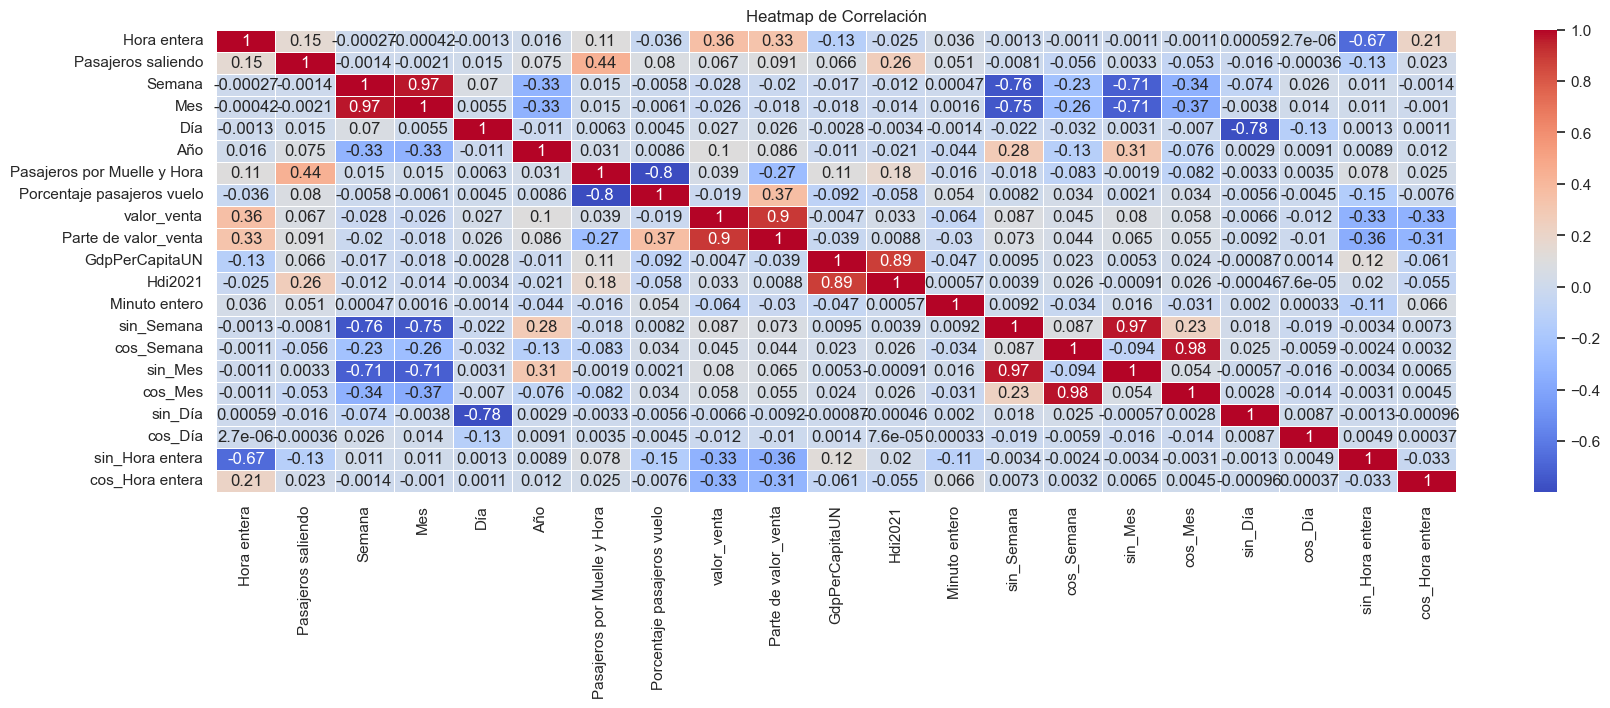

In [27]:
# Correlation matrix between features
correlation = datasets["muelle"].select_dtypes(include="number").corr()

plt.figure(figsize=(20, 6))
heatmap = sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap de Correlación')

# Rotar los labels del eje y
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

plt.show()